Name :Divyadharshini S
Roll no:24BAD022
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  

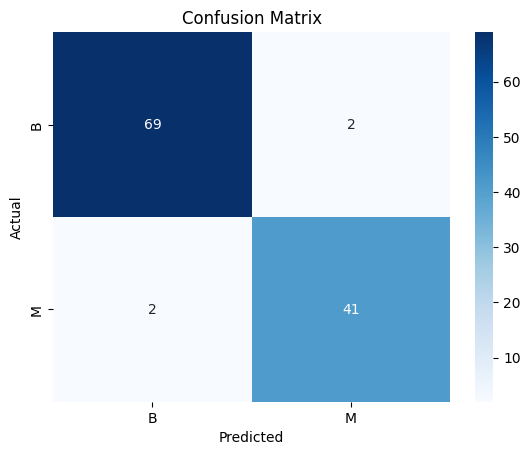

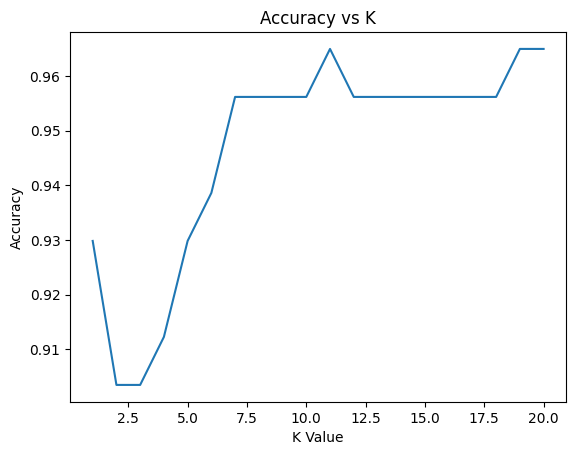

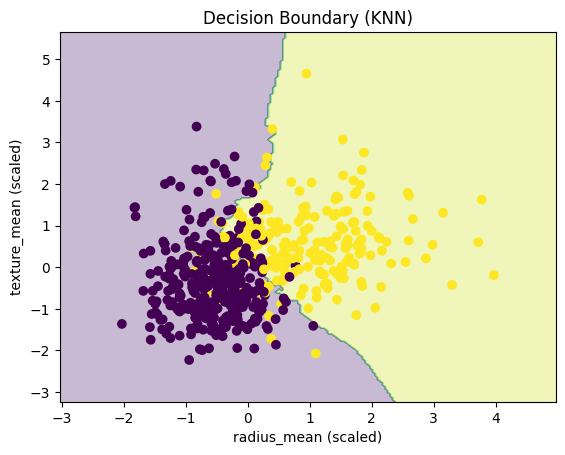

In [11]:
print("Name :Divyadharshini S\nRoll no:24BAD022")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

np.random.seed(42)

df = pd.read_csv("/kaggle/input/datasets/yasserh/breast-cancer-dataset/breast-cancer.csv")

print(df.head())
print(df['diagnosis'].value_counts())

X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
y = df['diagnosis']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X_scaled, y, df.index, test_size=0.2, random_state=42
)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

optimal_k = k_values[np.argmax(accuracies)]
print("Optimal K:", optimal_k)

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

comparison = pd.DataFrame({
    "Actual": encoder.inverse_transform(y_test),
    "Predicted": encoder.inverse_transform(y_pred)
}, index=test_idx)

misclassified = comparison[comparison["Actual"] != comparison["Predicted"]]
print("\nMisclassified Cases:\n", misclassified)

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

X_two = X_scaled[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two, y, test_size=0.2, random_state=42
)

knn2 = KNeighborsClassifier(n_neighbors=optimal_k)
knn2.fit(X_train2, y_train2)

x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_two[:, 0], X_two[:, 1], c=y)
plt.xlabel("radius_mean (scaled)")
plt.ylabel("texture_mean (scaled)")
plt.title("Decision Boundary (KNN)")
plt.show()

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

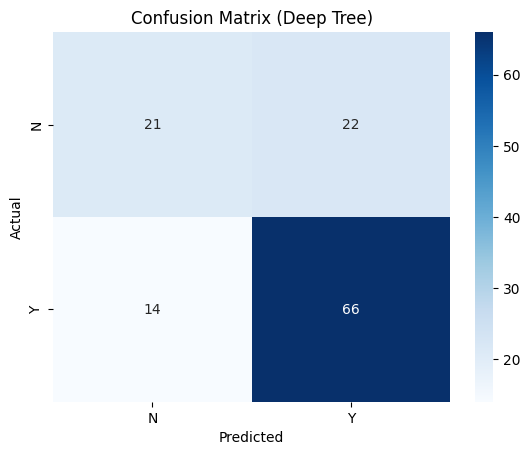

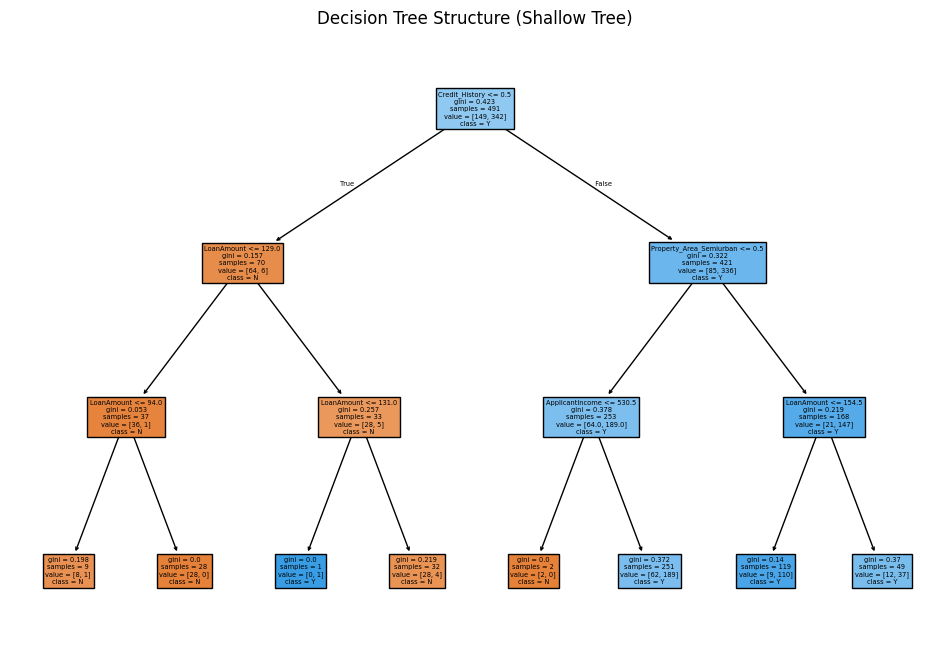

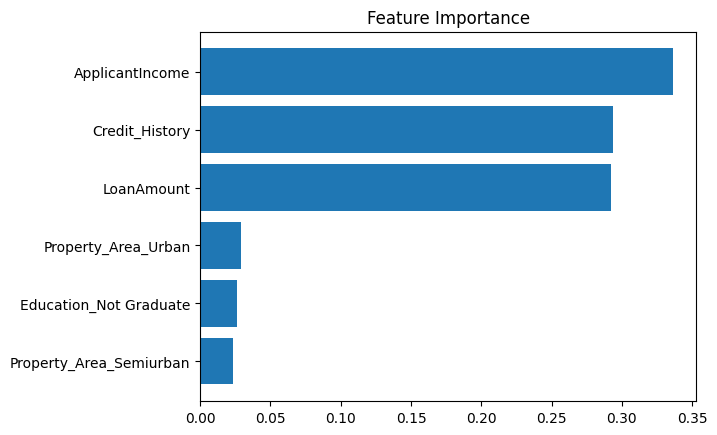

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

np.random.seed(42)

df = pd.read_csv("/kaggle/input/datasets/ninzaami/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

print(df.head())
print(df['Loan_Status'].value_counts())

df.fillna({
    'LoanAmount': df['LoanAmount'].median(),
    'Credit_History': df['Credit_History'].mode()[0],
    'Education': df['Education'].mode()[0],
    'Property_Area': df['Property_Area'].mode()[0]
}, inplace=True)

X = df[['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Education', 'Property_Area']]
y = df['Loan_Status']

X = pd.get_dummies(X, columns=['Education', 'Property_Area'], drop_first=True)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

y_pred_deep = deep_tree.predict(X_test)
y_pred_shallow = shallow_tree.predict(X_test)

print("Deep Tree Accuracy:", accuracy_score(y_test, y_pred_deep))
print("Shallow Tree Accuracy:", accuracy_score(y_test, y_pred_shallow))

print("\nDeep Tree Report:\n", classification_report(y_test, y_pred_deep))
print("\nShallow Tree Report:\n", classification_report(y_test, y_pred_shallow))

train_acc_deep = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc_deep = accuracy_score(y_test, y_pred_deep)

print("Deep Tree Train Accuracy:", train_acc_deep)
print("Deep Tree Test Accuracy:", test_acc_deep)

cm = confusion_matrix(y_test, y_pred_deep)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Deep Tree)")
plt.show()

plt.figure(figsize=(12,8))
plot_tree(shallow_tree, feature_names=X.columns, class_names=encoder.classes_, filled=True)
plt.title("Decision Tree Structure (Shallow Tree)")
plt.show()

importances = deep_tree.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.barh(X.columns[indices], importances[indices])
plt.title("Feature Importance")
plt.show()